<a href="https://colab.research.google.com/github/Kim-JungHyun01/AIStudy24/blob/master/%EB%94%A5%EB%9F%AC%EB%8B%9D/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D%EA%B8%B0%ED%83%80%EB%8F%84%EA%B5%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공신경망을 구성하는 절차
1. 더미데이터 준비
2. 훈련용(train), 검증용(val), 테스트용(test)으로 구분
3. 심층생성(Dense)
4. 모델에 적용(Sequential)
5. 컴파일진행(최적화기법 적용_adam)
6. 훈련시작 fit()
7. 검증(evaluate)

# 손실곡선
- fit() 메서드로 모델을 훈련하는 동안 훈련과정이 상세하게 출력되어 확인할 수 있게하는 것
    - 에포크횟수, 손실, 정확도등
    - 출력메시지 : <keras.src.callbacks.history.History at 0x78eda6421d80>
        - 코랩 노트북에 코드셀은 print() 명령어를 사용하지 않아도 마지막 라인에 실행결과를 자동으로 출력
        - History 라는 클래스 객체를 반환(훈련과정의 지표, 손실, 정확도등 내장) => 그래프 시각화가능

# 데이터

In [1]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism() # 테라스 버전오류 완화용

In [2]:
from tensorflow import keras

# \ : 엔터효과 제거용_한줄로 긴 문장을 자름
(train_input, train_target), (test_input, test_target) =\
             keras.datasets.fashion_mnist.load_data()

from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target =\
             train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print("test : ", test_input.shape, test_target.shape)
print("tain : ", train_scaled.shape, train_target.shape)
print("val  : ", val_scaled.shape, val_target.shape)

test :  (10000, 28, 28) (10000,)
tain :  (48000, 28, 28) (48000,)
val  :  (12000, 28, 28) (12000,)


# 심층신경망 생성 메서드

In [4]:
# 모델을 만드는 간단한 함수를 정의(하나의 매개변수를 받아 리턴)
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))    #입력층
    model.add(keras.layers.Dense(100, activation='relu'))   #은닉층

    # model_fn()함수에 (a_layer 매개변수로) 케라스층을 추가하면 은닉층 뒤에 하나의 층을 추가함
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

# 모델생성

In [5]:
model = model_fn()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
#                                  다중분류                  정확도
model.compile(loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련과정확인(verbose) 및 저장
- 훈련과정 출력을 조절함
- verbose = 0 : 훈련과정 출력x,
- verbose = 1 : 기본값, 에포크마다 진행 막대와 함께 손실등의 지표를 출력
- verbose = 2 : 진행막대 빼고 출력

In [7]:
# fit() 메서드 겨로가를 history 변수에 담음
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [9]:
# histroy 딕셔너리로 존재 : accuracy : 정확도 / loss : 손실도
print(history.history.keys())

# 정확도는 complie() 메서드의 metrics 매개변수에 accuracy를 추가했기때문에 histroy 속성에 포함

dict_keys(['accuracy', 'loss'])


In [12]:
print("accuracy : ", history.history['accuracy'])
print("loss     : ", history.history['loss'])
# 2차원[정확도, 손실] -> 그래프 시각화 가능

accuracy :  [0.8112499713897705, 0.8592708110809326, 0.8734791874885559, 0.8821874856948853, 0.8893541693687439]
loss     :  [0.5311374068260193, 0.39054960012435913, 0.35127100348472595, 0.3286345899105072, 0.31178048253059387]


## 훈련과정 시각화

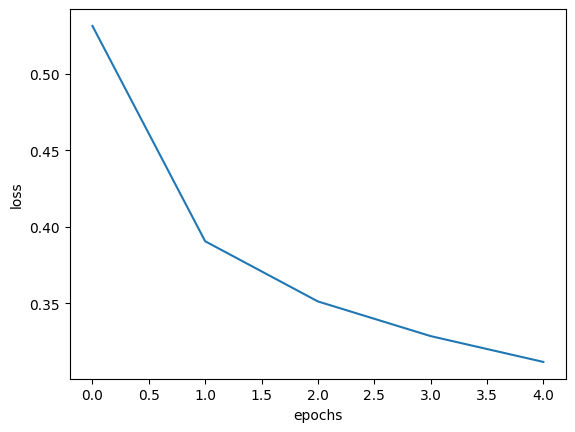

In [15]:
#손실률
import matplotlib.pyplot as plt
# history 속성에 포함된 손실과 정화도는 에포크마다 계산한 값이 순서대로 나열된 단순 리스트로 그래프 시각화가능

plt.plot(history.history['loss'])
plt.xlabel('epochs')    # 파이썬 인덱스 0부터이기에 0~4까지 x축표현
plt.ylabel('loss')      # 손실된 값
plt.show()
# 꺽어지는 부분을 잘 봐야함(에포트 : 1.0, 2.0)


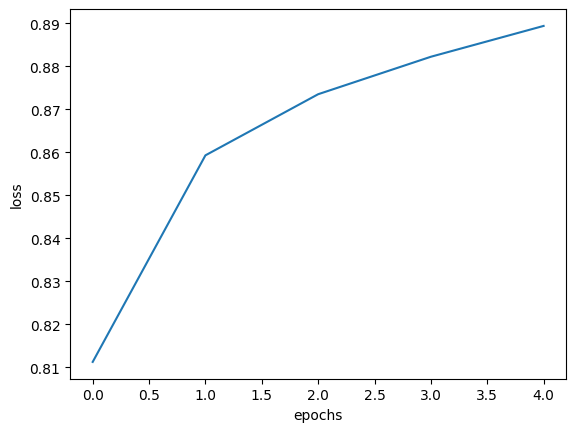

In [16]:
# 정확도
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.xlabel('epochs')    # 파이썬 인덱스 0부터이기에 0~4까지 x축표현
plt.ylabel('loss')      # 손실된 값
plt.show()
# 결과분석 : 에포크마다 손실이 감소하고 정확도가 향상함

# 재훈련(epochs 조정)
- 5번 -> 20번 증가

In [17]:
model = model_fn()
model.compile(loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
print("accuracy : ", history.history['accuracy'])
print("loss     : ", history.history['loss'])

accuracy :  [0.8109166622161865, 0.856458306312561, 0.8705624938011169, 0.8796666860580444, 0.8876041769981384, 0.8932083249092102, 0.8971458077430725, 0.9027291536331177, 0.9054166674613953, 0.909250020980835, 0.9116458296775818, 0.9147291779518127, 0.9164583086967468, 0.9180833101272583, 0.9192500114440918, 0.9223541617393494, 0.9248124957084656, 0.9255416393280029, 0.9270625114440918, 0.9283333420753479]
loss     :  [0.5377466082572937, 0.39828646183013916, 0.3585483729839325, 0.3345600366592407, 0.31714928150177, 0.3031317889690399, 0.2918485701084137, 0.28093406558036804, 0.2728918194770813, 0.26659029722213745, 0.2604311406612396, 0.2539425194263458, 0.24947060644626617, 0.24347759783267975, 0.23914147913455963, 0.23472851514816284, 0.22885528206825256, 0.2262561172246933, 0.22153089940547943, 0.2187170386314392]


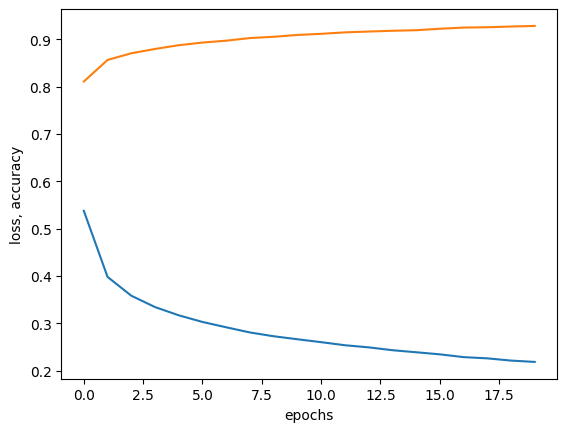

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')    # 파이썬 인덱스 0부터이기에 0~4까지 x축표현
plt.ylabel('loss, accuracy')      # 손실된 값
plt.show()

# 검증손실
- 인공신경망 : 경사하강법 이용(과대/과소적합 & 에포크사이의 관계 존재)
    - 훈련세트점수, 검증세트 점수필요
    - 단, 손실과 정확도만으로는 파악이 어려움

# keypoint
- 손실을 사용하는 것과 정확도를 사용하는 것의 차이?
    - 인공신경망 모델이 최적화하는 대상은 정확도가 아니라 손실함수임
    - 손실감소에 비례하여 정확도가 높아지지 않는 경우도 있는데 모델이 잘 훈련되었는지 판단하려면 정확도보다는 **손실 함수의 값을 확인**하는 것이 더 좋은 방법임

In [24]:
model = model_fn()
model.compile(loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7637 - loss: 0.6723 - val_accuracy: 0.8473 - val_loss: 0.4305
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8519 - loss: 0.4061 - val_accuracy: 0.8569 - val_loss: 0.3966
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8685 - loss: 0.3613 - val_accuracy: 0.8632 - val_loss: 0.3826
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8800 - loss: 0.3340 - val_accuracy: 0.8613 - val_loss: 0.3851
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8874 - loss: 0.3157 - val_accuracy: 0.8648 - val_loss: 0.3893
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8924 - loss: 0.3036 - val_accuracy: 0.8697 - val_loss: 0.3845
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8973 - loss: 0.2927 - val_accuracy: 0.8680 - val_loss: 0.3961
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9003 - loss: 0.2851 - 

In [25]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## 검증손실 시각화

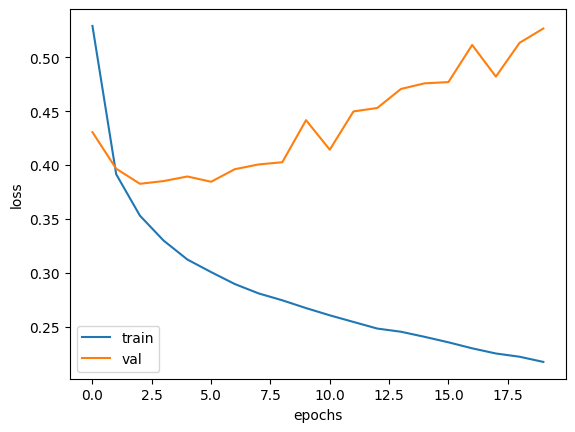

In [29]:
# 과대, 과소적합 문제를 조사하기 위해서 훈련손실, 검증 손실을 한 그래프시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epochs')    # 파이썬 인덱스 0부터이기에 0~4까지 x축표현
plt.ylabel('loss')      # 손실된 값

plt.legend(["train", "val"])
plt.show()
# 심하게 뛰는 것들은 사용하면x => 과대적합

# 결론
- 초기에 검증 손실이 감소하다가 5번 에포크만에 다시 상승함
- 훈련손실은 꾸준히 감소하기 때문에 **과대적합 모델**이 만들어짐
- 검증 손실이 상승하는 시점을 가능한 늦추면 세트에 대한 손실이 줄어들고 검증세트에 대한 정확도가 증가할 거 같다

# 개선
- 예전에 사용했던 규제방식대신에 신경망에 특화된 규제방법(드룹아웃)을 사용

# 최적화실행

## RMSprop

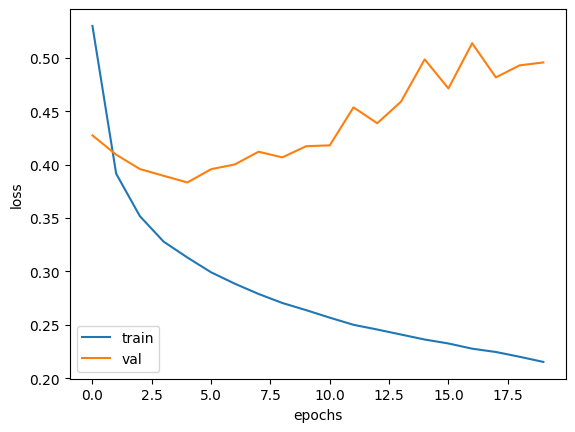

In [31]:
#옵티마이져 하이퍼파라미터를 조정하여 과대적합 완화시도
model = model_fn()
model.compile(optimizer="RMSprop", loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epochs')    # 파이썬 인덱스 0부터이기에 0~4까지 x축표현
plt.ylabel('loss')      # 손실된 값

plt.legend(["train", "val"])
plt.show()

## Adagrad

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


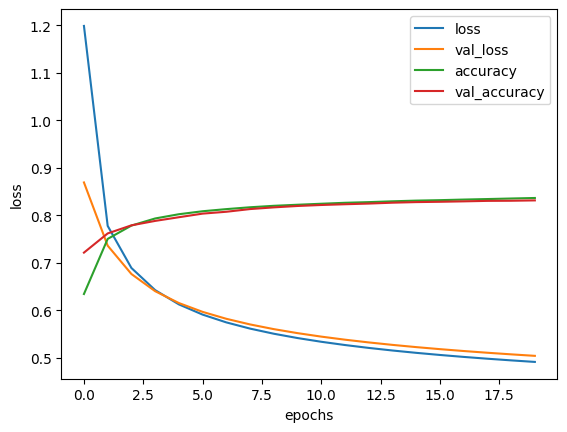

In [33]:
model = model_fn()
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('epochs')    # 파이썬 인덱스 0부터이기에 0~4까지 x축표현
plt.ylabel('loss, accuracy')      # 손실된 값

plt.legend(["loss", "val_loss","accuracy", "val_accuracy" ])
plt.show()

## adam

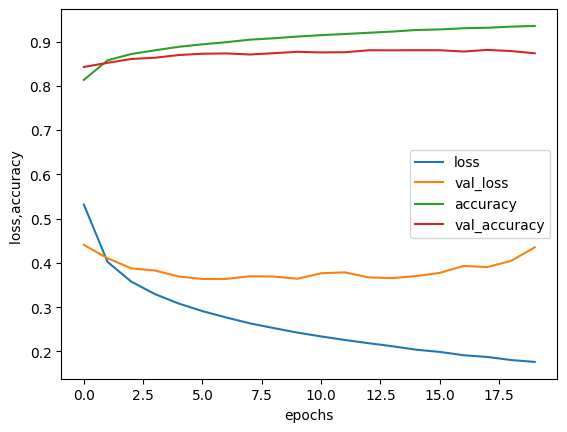

In [34]:
model = model_fn()
model.compile(optimizer="adam", loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('epochs')    # 파이썬 인덱스 0부터이기에 0~4까지 x축표현
plt.ylabel('loss,accuracy ')      # 손실된 값

plt.legend(["loss", "val_loss","accuracy", "val_accuracy" ])
plt.show()